In [1]:
%matplotlib inline
import matplotlib.pyplot as plt 
import numpy as np 
from pydmd import DMD

In [2]:
import pandas as pd 
train=pd.read_csv('emissions.csv')
train.head()


,Country,ISO 3166-1 alpha-3,Year,Total,Coal,Oil,Gas,Cement,Flaring,Other,Per Capita
0,Afghanistan,AFG,1750,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,1751,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,1752,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,AFG,1753,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,AFG,1754,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
train1=train.drop(['ISO 3166-1 alpha-3','Coal','Oil','Gas','Cement','Flaring','Other','Per Capita'],axis=1)

In [4]:
train1.head()

,Country,Year,Total
0,Afghanistan,1750,0.0
1,Afghanistan,1751,0.0
2,Afghanistan,1752,0.0
3,Afghanistan,1753,0.0
4,Afghanistan,1754,0.0


In [5]:
train1 = train1.replace(np.inf, np.nan).replace(-np.inf, np.nan).dropna()
modtrain=train1

In [6]:
# Arranging the data of countries through the years
modtrain1=modtrain.sort_values('Year')

In [7]:
modtrain1.shape

(62904, 3)

In [8]:
train2=train1.drop(['Country','Year'],axis=1)
train2.head()
train2[np.isfinite(train2).all(1)]

,Total
0,0.000000
1,0.000000
2,0.000000
3,0.000000
4,0.000000
...,...
63099,36096.739276
63100,36826.506600
63101,37082.558969
63102,35264.085734


In [9]:
l4=train1.Country.unique()
ln=l4[:-1]
dt=[]
for i in ln:
    w=train1[train1.Country==i]
    q1=w[w.Year>2019]
    qq1=q1[q1.Year<2022].T
    #print(q1.shape)
    #q1=w.T
    q2=qq1.drop(['Country','Year'])
    q3=np.array(q2).flatten()
    #q4=q3.flatten()
    dt.append(q3)
dt=np.array(dt)
dtt=dt.astype(float)

In [10]:
# Implementing DMD 
#hodmd = DMD(svd_rank=5,opt=True).fit(dt3)
hodmd=DMD().fit(dtt)
# svd_rank - number of singular values/vectors to be taken 

D:\Anaconda\lib\site-packages\pydmd\utils.py:67: RuntimeWarning: SVD optimal rank is 0. The largest singular values are indistinguishable from noise. Setting rank truncation to 1.
  warnings.warn(


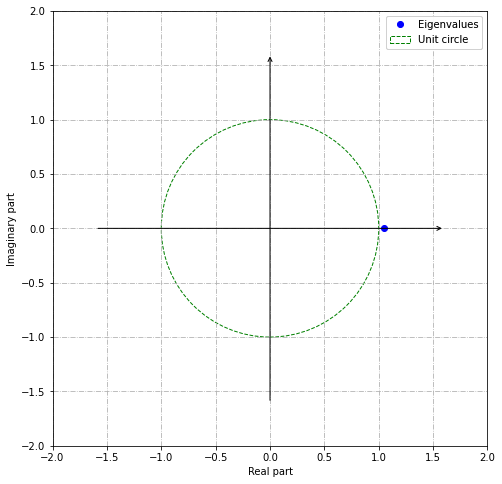

In [11]:
hodmd.plot_eigs()
# plotting the eigenvalues from DMD 

In [12]:
print("Shape before manipulation: {}".format(hodmd.reconstructed_data.shape))
# Predicting the system for the future 
hodmd.dmd_time['dt'] *= .25
hodmd.dmd_time['tend'] *= 0.7
print("Shape after manipulation: {}".format(hodmd.reconstructed_data.shape))

Shape before manipulation: (231, 2)
Shape after manipulation: (231, 4)


In [13]:
fig = plt.figure()
tmdt=hodmd.reconstructed_data 
dmd_states = [state for state in tmdt]

<Figure size 432x288 with 0 Axes>

In [14]:
dmd_states=np.array(dmd_states)
dmd_states.shape

(231, 4)

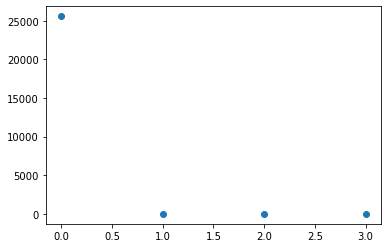

In [15]:
import scipy
snapshots=dmd_states.T
fig = plt.plot(scipy.linalg.svdvals(np.array([snapshot.flatten() for snapshot in snapshots]).T), 'o')

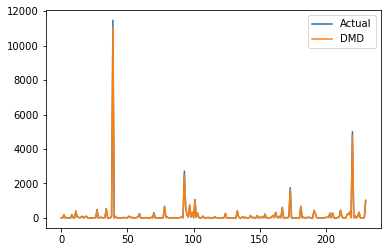

In [16]:
plt.plot(dtt[:,1])
plt.plot(dmd_states[:,1])
plt.legend(["Actual","DMD"])

In [17]:
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as rmse
from sklearn.metrics import mean_absolute_percentage_error as mape
# error values
print(2021)
print(mape(dtt[:,1].real,dmd_states[:,1].real))
print(rmse(dtt[:,1].real,dmd_states[:,1].real))
print(mae(dtt[:,1].real,dmd_states[:,1].real))
print(2020)
print(mape(dtt[:,0].real,dmd_states[:,0].real))
print(rmse(dtt[:,0].real,dmd_states[:,0].real))
print(mae(dtt[:,0].real,dmd_states[:,0].real))

2021
0.04874669951092639
1193.882042158988
6.832112629543316
2020
6.872499614221453e-16
1.3981576987409963e-26
1.8134652780165518e-14


In [18]:
#predicted value for 2022 
np.sum(dmd_states[:,2])

36166.33384859626

In [19]:
#predicted value for 2023
np.sum(dmd_states[:,3])

36626.07800531298

In [20]:
#predicted value for 2021
np.sum(dmd_states[:,1])

35712.360571568184

In [21]:
#predicted value for 2020
np.sum(dmd_states[:,0])

35264.085736